<a href="https://colab.research.google.com/github/aradhyxsingh/Credit_Card_Fraud_Detection/blob/master/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *Credit Card Fraud Detection:*

It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

#### *Content : - Fraudulent credit card transactions.*

#### *Source:- [Click Here](https://www.kaggle.com/mlg-ulb/creditcardfraud)*

#### *Project Overview :*

1- Exploratory Data Analysis - EDA

2- Data Visualization

5- Data Scaling

6- Resampling - SMOTEENN

7- Machine Learning Algorithms on Resampled data:

    1- Principle component analysis

    2- Logistic Regression

    3- Random Forest Classifier

    4- Naive Bayes Classifier

    5- Deep Neural Network


In [13]:
import pandas as pd
import numpy as np
import io
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
link = 'https://drive.google.com/open?id=1mT5Au55RAjDABxfV_7HKZc__0CTYtMcz'

In [16]:
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

1mT5Au55RAjDABxfV_7HKZc__0CTYtMcz


In [0]:
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('creditcard.csv')

In [0]:
df=pd.read_csv('creditcard.csv')

In [19]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [21]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [22]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [23]:
df.duplicated().sum()

1081

In [0]:
df.drop_duplicates(inplace=True)

In [25]:
len(df)

283726

**The data is Highly Unbalanced**

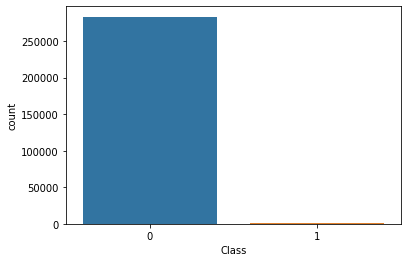

In [0]:
sns.countplot('Class',data=df)

**Percentage of the positive class (frauds)**

In [0]:
len(df[df['Class']==1])/len(df)*100

0.1667101358352777

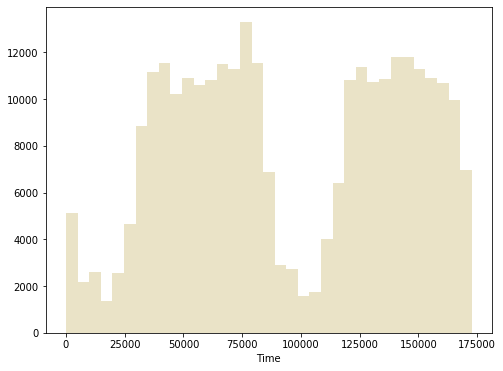

In [0]:
plt.figure(figsize=(8,6))
sns.set_color_codes()
sns.distplot(df['Time'],bins=35,color='y',kde=False)

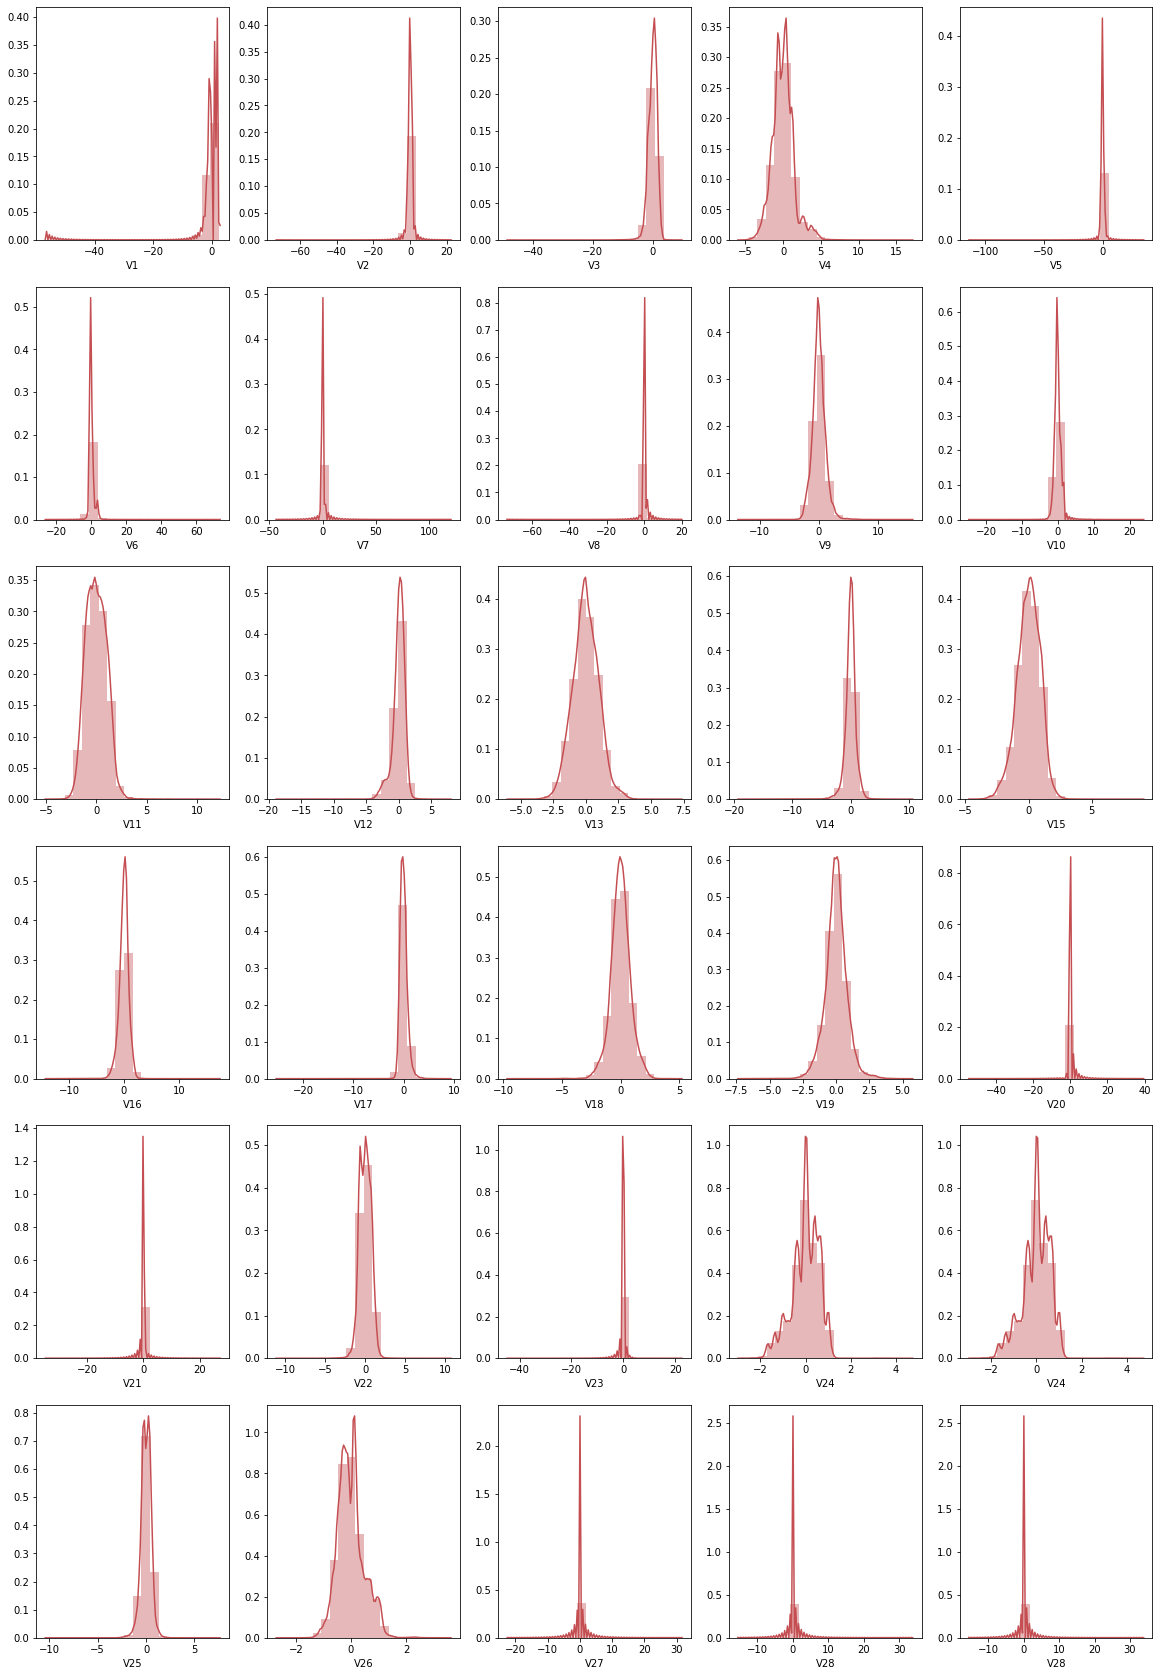

In [0]:
fig,axs = plt.subplots(ncols=5,nrows=6,figsize=(20,30))
sns.distplot(df['V1'],color='r',kde=True,bins=20,ax=axs[0,0])
sns.distplot(df['V2'],color='r',kde=True,bins=20,ax=axs[0,1])
sns.distplot(df['V3'],color='r',kde=True,bins=20,ax=axs[0,2])
sns.distplot(df['V4'],color='r',kde=True,bins=20,ax=axs[0,3])
sns.distplot(df['V5'],color='r',kde=True,bins=20,ax=axs[0,4])
sns.distplot(df['V6'],color='r',kde=True,bins=20,ax=axs[1,0])
sns.distplot(df['V7'],color='r',kde=True,bins=20,ax=axs[1,1])
sns.distplot(df['V8'],color='r',kde=True,bins=20,ax=axs[1,2])
sns.distplot(df['V9'],color='r',kde=True,bins=20,ax=axs[1,3])
sns.distplot(df['V10'],color='r',kde=True,bins=20,ax=axs[1,4])
sns.distplot(df['V11'],color='r',kde=True,bins=20,ax=axs[2,0])
sns.distplot(df['V12'],color='r',kde=True,bins=20,ax=axs[2,1])
sns.distplot(df['V13'],color='r',kde=True,bins=20,ax=axs[2,2])
sns.distplot(df['V14'],color='r',kde=True,bins=20,ax=axs[2,3])
sns.distplot(df['V15'],color='r',kde=True,bins=20,ax=axs[2,4])
sns.distplot(df['V16'],color='r',kde=True,bins=20,ax=axs[3,0])
sns.distplot(df['V17'],color='r',kde=True,bins=20,ax=axs[3,1])
sns.distplot(df['V18'],color='r',kde=True,bins=20,ax=axs[3,2])
sns.distplot(df['V19'],color='r',kde=True,bins=20,ax=axs[3,3])
sns.distplot(df['V20'],color='r',kde=True,bins=20,ax=axs[3,4])
sns.distplot(df['V21'],color='r',kde=True,bins=20,ax=axs[4,0])
sns.distplot(df['V22'],color='r',kde=True,bins=20,ax=axs[4,1])
sns.distplot(df['V23'],color='r',kde=True,bins=20,ax=axs[4,2])
sns.distplot(df['V24'],color='r',kde=True,bins=20,ax=axs[4,3])
sns.distplot(df['V24'],color='r',kde=True,bins=20,ax=axs[4,4])
sns.distplot(df['V25'],color='r',kde=True,bins=20,ax=axs[5,0])
sns.distplot(df['V26'],color='r',kde=True,bins=20,ax=axs[5,1])
sns.distplot(df['V27'],color='r',kde=True,bins=20,ax=axs[5,2])
sns.distplot(df['V28'],color='r',kde=True,bins=20,ax=axs[5,3])
sns.distplot(df['V28'],color='r',kde=True,bins=20,ax=axs[5,4])

In [0]:
df1=df.corr()

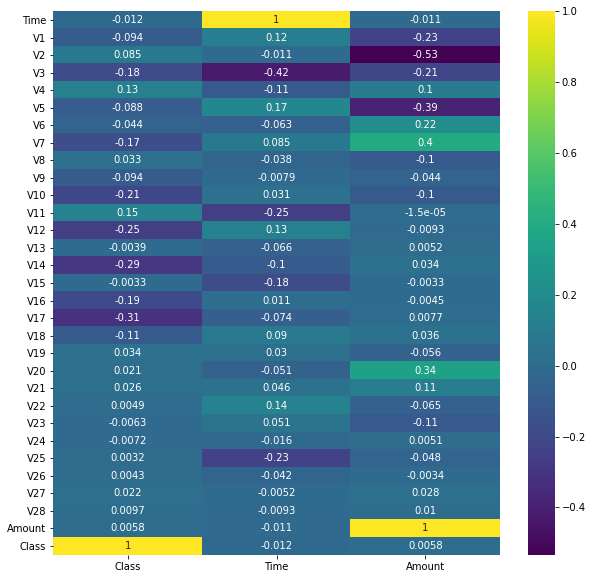

In [0]:
plt.figure(figsize=(10,10))
sns.heatmap(df1[['Class','Time','Amount']],cmap='viridis',annot=True)
#plots correlation as color encoded matrices.

<Figure size 720x720 with 0 Axes>

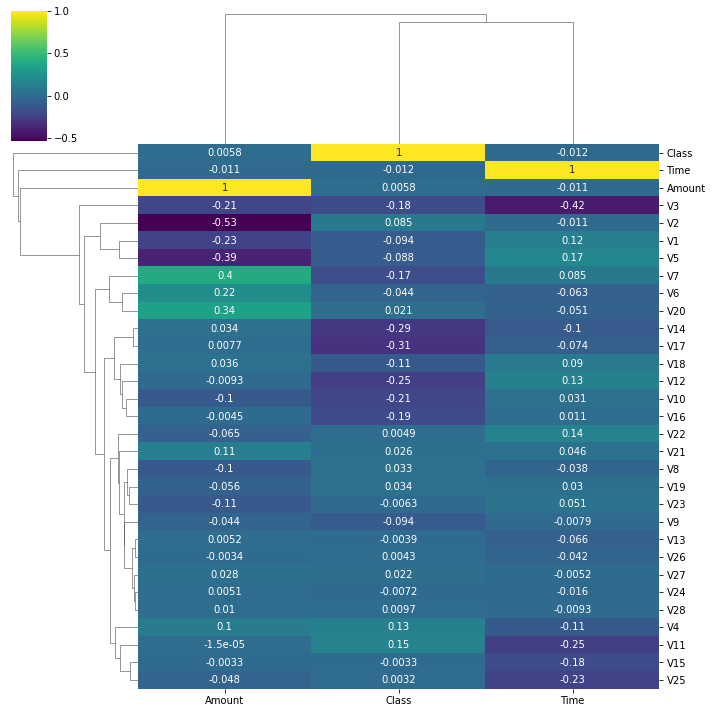

In [0]:
plt.figure(figsize=(10,10))
sns.clustermap(df1[['Class','Time','Amount']],cmap='viridis',annot=True)

In [0]:
df1['Class'].sort_values()

V17      -0.313498
V14      -0.293375
V12      -0.250711
V10      -0.206971
V16      -0.187186
V3       -0.182322
V7       -0.172347
V18      -0.105340
V1       -0.094486
V9       -0.094021
V5       -0.087812
V6       -0.043915
Time     -0.012359
V24      -0.007210
V23      -0.006333
V13      -0.003897
V15      -0.003300
V25       0.003202
V26       0.004265
V22       0.004887
Amount    0.005777
V28       0.009682
V20       0.021486
V27       0.021892
V21       0.026357
V8        0.033068
V19       0.033631
V2        0.084624
V4        0.129326
V11       0.149067
Class     1.000000
Name: Class, dtype: float64

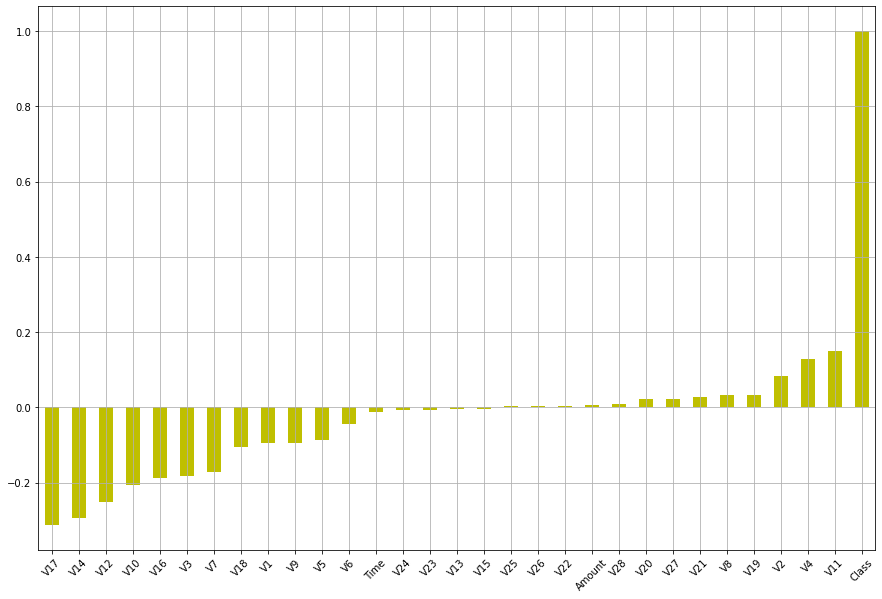

In [0]:
plt.figure(figsize=(15,10))
df.corrwith(df['Class']).sort_values().plot.bar(color='y',grid=True,rot=45,)

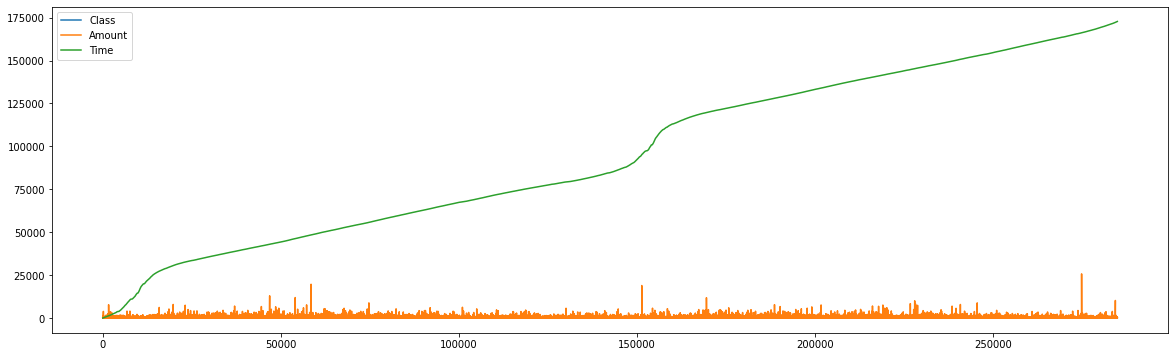

In [0]:
#time-series analysis
df[['Class','Amount','Time']].plot(figsize=(20, 6),)
plt.show()

### Normalizing the Data
Using a RobustScalerr to normalize the feature data 'Amount' and 'Time' which according to the question were not scaled.

In [0]:
from sklearn.preprocessing import RobustScaler
rob_scaler=RobustScaler()
df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1, 1))
df.drop(['Time','Amount'],axis=1,inplace=True)

In [27]:
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.774718,-0.995290
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.268530,-0.995290
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.959811,-0.995279
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.411487,-0.995279
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.667362,-0.995267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0,-0.295230,1.035258
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0,0.038798,1.035270
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0,0.638020,1.035282
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,0,-0.166875,1.035282


*Because data is highly unbalanced we use SMOTEEN  resampling technique which balances the existing dataset*

In [0]:
X= df.drop('Class',axis=1)
y= df['Class']

In [29]:
from imblearn.combine import SMOTEENN
smt=SMOTEENN(ratio=1,random_state=0)
X_smt,y_smt=smt.fit_sample(X,y)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/loca

In [30]:
X_smt.shape

(566021, 30)

In [31]:
y_smt.shape

(566021,)

*Lets create a dataframe out of the resampled data*

In [32]:
X.columns.values

array(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',
       'scaled_amount', 'scaled_time'], dtype=object)

In [0]:
X_df = pd.DataFrame(X_smt,columns=X.columns.values)

In [0]:
y_df = pd.DataFrame(y_smt,columns=['Class'])

In [0]:
df2= pd.concat([X_df,y_df],axis=1)

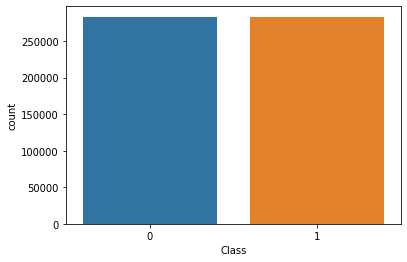

In [37]:
sns.countplot('Class',data=df2)

In [38]:
df2

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,scaled_amount,scaled_time,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.774718,-0.995290,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.268530,-0.995290,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.959811,-0.995279,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.411487,-0.995279,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.667362,-0.995267,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566016,-0.079350,1.918629,-4.121293,4.003276,-0.841944,-0.303337,-2.306414,1.229704,-0.815670,-3.997785,2.992092,-3.581003,-1.646045,-7.393331,-0.450394,-2.540468,-0.617213,1.063934,2.205187,0.478420,0.624022,0.806284,0.120706,0.290902,-0.348904,0.004852,0.439397,0.114463,0.895168,0.523971,1
566017,-19.054002,11.751975,-21.816428,6.083618,-14.626676,-4.299491,-15.295292,12.772845,-4.004749,-8.943501,5.873180,-8.295799,0.139613,-8.878596,0.011548,-7.093912,-13.660972,-4.962635,1.279901,1.571101,1.745679,-1.343566,-0.760579,0.116731,1.286182,-0.225378,1.625215,0.485878,1.084550,-0.684220,1
566018,-4.045948,3.236658,-6.412609,6.975190,0.091720,-1.955699,-2.515728,-0.580661,-1.828559,-3.113277,4.582102,-9.203339,-1.475828,-14.157095,0.759016,-4.223208,-6.384512,-1.377191,0.287671,-0.233339,0.500305,0.539548,0.053557,-0.618924,0.241990,0.309917,-2.650110,0.492508,-0.292032,0.791504,1
566019,-4.140703,2.598033,-4.029792,1.339454,-2.347884,-1.473336,-4.151667,1.297270,0.863594,-4.734952,3.920301,-6.267592,0.078543,-4.495893,-0.873230,-1.741611,-3.543558,0.135301,0.048609,-0.879892,1.220909,0.019513,0.433047,-0.296970,0.137656,0.097674,-0.813525,0.323284,-0.276640,0.079835,1


### Train test split:

In [0]:
X= df2.drop('Class',axis=1)
y= df2['Class']
from sklearn.model_selection import train_test_split
X_trainsm, X_testsm, y_trainsm, y_testsm = train_test_split(X_smt,y_smt, test_size=0.33, random_state=101)

## Principle Component Analysis

#### PCA Visualisation

In [0]:
from sklearn.decomposition import PCA

In [0]:
pca = PCA(n_components=2)

In [76]:
pca.fit(df2)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [0]:
x_pca = pca.transform(df2)

In [78]:
df.shape

(283726, 31)

In [79]:
x_pca.shape

(566021, 2)

Text(0, 0.5, 'Second Principal Component')

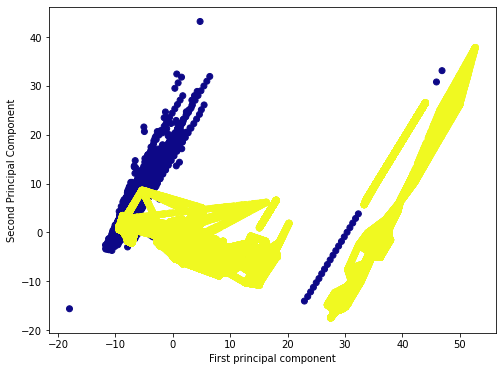

In [80]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=df2['Class'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [81]:
#Principal Component Analysis - used for dimensionality reduction
#taking no.of components(clusters) i.e. n_components=2
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(X_trainsm)
x_pca=pca.transform(X_trainsm)
explained_variance = pca.explained_variance_ratio_
print(pd.DataFrame(explained_variance))

          0
0  0.694351
1  0.088293


## Logistic Regression

In [63]:
from sklearn.linear_model import LogisticRegression
lm = LogisticRegression(random_state = 101, penalty = 'l2',dual=False,max_iter=7600)  #Ridge('l2') regression
lm.fit(X_trainsm, y_trainsm)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=7600,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=101, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
# making predictions on test set.
predictions_logistic = lm.predict(X_testsm)

In [65]:
df_logistic = pd.DataFrame({'Actual': y_testsm, 'Predicted': predictions_logistic})
df_logistic.head()

,Actual,Predicted
0,0,0
1,1,1
2,0,0
3,0,0
4,0,0


In [68]:
from sklearn.metrics import confusion_matrix,classification_report,explained_variance_score
print('Confusion Matrix:\n',confusion_matrix(y_testsm,predictions_logistic))
print('Classification Report:\n',classification_report(y_testsm,predictions_logistic,digits=6))
print('\n Explained variance score:',explained_variance_score(y_testsm,predictions_logistic))

Confusion Matrix:
 [[91183  2390]
 [ 7278 85936]]
Classification Report:
               precision    recall  f1-score   support

           0   0.926082  0.974458  0.949655     93573
           1   0.972941  0.921922  0.946745     93214

    accuracy                       0.948241    186787
   macro avg   0.949512  0.948190  0.948200    186787
weighted avg   0.949467  0.948241  0.948202    186787


 Explained variance score: 0.795700516029897


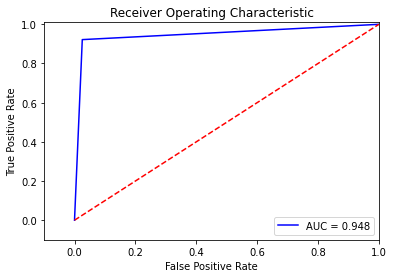

0.9481900219845134

In [67]:
from sklearn.metrics import precision_recall_curve, auc, roc_auc_score, roc_curve
fpr, tpr, thresholds = roc_curve(y_testsm, predictions_logistic)

roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
roc_auc

## Random Forest Classifier

In [57]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state = 0, n_estimators = 100,criterion = 'entropy')
rfc.fit(X_trainsm, y_trainsm)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [0]:
# making predictions on test set.
predictions_rfc=rfc.predict(X_testsm)

In [59]:
df_rfc = pd.DataFrame({'Actual': y_testsm, 'Predicted': predictions_rfc})
df_rfc.head()

,Actual,Predicted
0,0,0
1,1,1
2,0,0
3,0,0
4,0,0


In [70]:
from sklearn.metrics import confusion_matrix,classification_report
print('Confusion Matrix:\n',confusion_matrix(y_testsm,predictions_rfc))
print('Classification Report:\n',classification_report(y_testsm,predictions_rfc,digits=6))
print('\n Explained variance score:',explained_variance_score(y_testsm,predictions_rfc))

Confusion Matrix:
 [[93566     7]
 [    0 93214]]
Classification Report:
               precision    recall  f1-score   support

           0   1.000000  0.999925  0.999963     93573
           1   0.999925  1.000000  0.999962     93214

    accuracy                       0.999963    186787
   macro avg   0.999962  0.999963  0.999963    186787
weighted avg   0.999963  0.999963  0.999963    186787


 Explained variance score: 0.9998501016981661


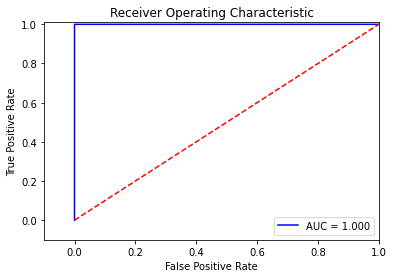

0.9999625960480053

In [62]:
from sklearn.metrics import precision_recall_curve, auc, roc_auc_score, roc_curve
fpr, tpr, thresholds = roc_curve(y_testsm, predictions_rfc)

roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
roc_auc

## Naive Bayes Classifier

In [52]:
 from sklearn.naive_bayes import GaussianNB
#Naive Bayes classifier assumes that the presence of a particular feature 
#in a class is unrelated to the presence of any other feature.
nb=GaussianNB()
nb.fit(X_trainsm,y_trainsm)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
# making predictions on test set.
predictions_nb=nb.predict(X_testsm)

In [54]:
df_nb = pd.DataFrame({'Actual': y_testsm, 'Predicted': predictions_nb})
df_nb.head()

,Actual,Predicted
0,0,0
1,1,1
2,0,0
3,0,0
4,0,0


In [55]:
from sklearn.metrics import confusion_matrix,classification_report
print('Confusion Matrix:\n',confusion_matrix(y_testsm,predictions_nb))
print('Classification Report:\n',classification_report(y_testsm,predictions_nb,digits=6))

Confusion Matrix:
 [[91284  2289]
 [13969 79245]]
Classification Report:
               precision    recall  f1-score   support

           0   0.867282  0.975538  0.918230     93573
           1   0.971926  0.850141  0.906963     93214

    accuracy                       0.912960    186787
   macro avg   0.919604  0.912839  0.912597    186787
weighted avg   0.919503  0.912960  0.912607    186787



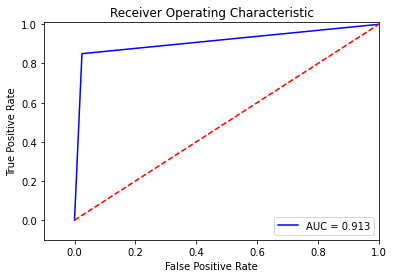

0.9128391761123492

In [56]:
from sklearn.metrics import precision_recall_curve, auc, roc_auc_score, roc_curve
fpr, tpr, thresholds = roc_curve(y_testsm, predictions_nb)

roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
roc_auc

## Neural Networks

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [0]:
model=Sequential()
model.add(Dense(31,activation='sigmoid'))
model.add(Dense(31,activation='sigmoid'))
model.add(Dense(31,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))


In [0]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy')

In [0]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=3)

In [44]:
model.fit(X_trainsm,y_trainsm,epochs=20,validation_data=(X_testsm,y_testsm),verbose=1,callbacks=[early_stop])

Epoch 1/20
11852/11852 [==============================] - 54s 5ms/step - loss: 0.0837 - val_loss: 0.0358
Epoch 2/20
11852/11852 [==============================] - 53s 5ms/step - loss: 0.0208 - val_loss: 0.0148
Epoch 3/20
11852/11852 [==============================] - 54s 5ms/step - loss: 0.0139 - val_loss: 0.0146
Epoch 4/20
11852/11852 [==============================] - 54s 5ms/step - loss: 0.0128 - val_loss: 0.0146
Epoch 5/20
11852/11852 [==============================] - 54s 5ms/step - loss: 0.0123 - val_loss: 0.0207
Epoch 6/20
11852/11852 [==============================] - 54s 5ms/step - loss: 0.0117 - val_loss: 0.0111
Epoch 7/20
11852/11852 [==============================] - 53s 4ms/step - loss: 0.0115 - val_loss: 0.0106
Epoch 8/20
11852/11852 [==============================] - 53s 4ms/step - loss: 0.0113 - val_loss: 0.0103
Epoch 9/20
11852/11852 [==============================] - 53s 4ms/step - loss: 0.0110 - val_loss: 0.0163
Epoch 10/20
11852/11852 [==============================

In [45]:
model.history.history

{'loss': [0.08373302221298218,
  0.02083195000886917,
  0.013852628879249096,
  0.012761617079377174,
  0.012293966487050056,
  0.011664518155157566,
  0.011457701213657856,
  0.011271375231444836,
  0.010954809375107288,
  0.011043742299079895,
  0.01011014822870493,
  0.009799775667488575,
  0.009602502919733524,
  0.00967191532254219,
  0.00937335193157196],
 'val_loss': [0.03575493395328522,
  0.014815250411629677,
  0.014633049257099628,
  0.014620720408856869,
  0.020659731701016426,
  0.011132465675473213,
  0.010583678260445595,
  0.010328052565455437,
  0.016267558559775352,
  0.012666918337345123,
  0.009738252498209476,
  0.009487699717283249,
  0.01132587343454361,
  0.011674304492771626,
  0.010998239740729332]}

In [0]:
loss_df=pd.DataFrame(model.history.history)

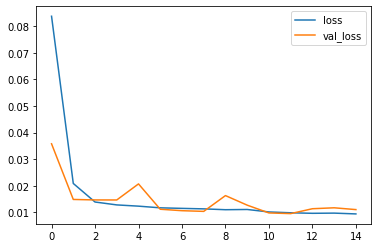

In [47]:
loss_df.plot()

In [0]:
pred_neural=model.predict(X_testsm)

In [49]:
from sklearn import metrics 
print('Mean Absolute Error:',metrics.mean_absolute_error(y_testsm,pred_neural))
print('Mean Squared Error:',metrics.mean_squared_error(y_testsm,pred_neural))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_testsm,pred_neural)))

Mean Absolute Error: 0.0037997743022303854
Mean Squared Error: 0.0023573737366214477
Root Mean Squared Error: 0.04855279329370708


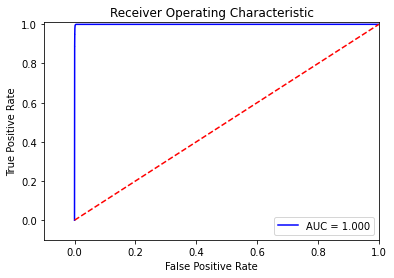

0.9998028239324412

In [50]:
from sklearn.metrics import precision_recall_curve, auc, roc_auc_score, roc_curve
fpr, tpr, thresholds = roc_curve(y_testsm, pred_neural)

roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
roc_auc

In [0]:
print('Compiled Results:\n')
print('Logistic Regression Classifier:\n')
print('Classification Report:\n',classification_report(y_test,predictions_logistic,digits=6))
print('Random Forest Classifier:\n')
print('Classification Report:\n',classification_report(y_test,predictions_rfc,digits=6))
print('Naiva Bayes Algorithm:\n')
print('Classification Report:\n',classification_report(y_test,predictions_nb,digits=6))
print('Neural Network:\n')
print('Classification Report:\n',classification_report(y_test,pred_neural,digits=6))

Compiled Results:

Logistic Regression Classifier:

Classification Report:
               precision    recall  f1-score   support

           0   0.999230  0.999861  0.999545     93478
           1   0.860215  0.526316  0.653061       152

    accuracy                       0.999092     93630
   macro avg   0.929723  0.763088  0.826303     93630
weighted avg   0.999005  0.999092  0.998983     93630

Random Forest Classifier:

Classification Report:
               precision    recall  f1-score   support

           0   0.999636  0.999936  0.999786     93478
           1   0.951613  0.776316  0.855072       152

    accuracy                       0.999573     93630
   macro avg   0.975625  0.888126  0.927429     93630
weighted avg   0.999558  0.999573  0.999551     93630

Naiva Bayes Algorithm:

Classification Report:
               precision    recall  f1-score   support

           0   0.998377  1.000000  0.999188     93478
           1   0.000000  0.000000  0.000000       152

    acc

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
               precision    recall  f1-score   support

           0   0.999711  0.999775  0.999743     93478
           1   0.856164  0.822368  0.838926       152

    accuracy                       0.999487     93630
   macro avg   0.927938  0.911072  0.919335     93630
weighted avg   0.999478  0.999487  0.999482     93630

